In [1]:

import tensorflow as tf
import keras
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import img_to_array

shared_dir = '/Users/prateek/Desktop/ML/Major/augmented/'
infected_dir = shared_dir + 'True_parasitized/'
uninfected_dir = shared_dir + 'True_uninfected/'
input_shape = [32, 32]
batch = 32

parasitized_data = os.listdir(infected_dir)
uninfected_data = os.listdir(uninfected_dir)

data = []
labels = []

for img in parasitized_data:
    try:
        img_read = plt.imread(infected_dir + img)
        img_resize = cv2.resize(img_read, input_shape)
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except :
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread(uninfected_dir + img)
        img_resize = cv2.resize(img_read, input_shape)
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

shared_dir = '/Users/prateek/Desktop/ML/Major/augmented/'
infected_dir = shared_dir + 'False_uninfected/'
uninfected_dir = shared_dir + 'False_parasitized/'
input_shape = [32, 32]
batch = 32

parasitized_data = os.listdir(infected_dir)
uninfected_data = os.listdir(uninfected_dir)

for img in parasitized_data:
    try:
        img_read = plt.imread(infected_dir + img)
        img_resize = cv2.resize(img_read, input_shape)
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except :
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread(uninfected_dir + img)
        img_resize = cv2.resize(img_read, input_shape)
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

input_shape.append(3)
image_data = np.array(data)
labels = np.array(labels)

print("image_shape:", input_shape)
print("image_data:",len(image_data))
print("labels:",len(labels))

image_shape: [32, 32, 3]
image_data: 275580
labels: 275580


In [2]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2,random_state = 0)

y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

X_train: 220464
X_test: 55116
y_train: 220464
y_test: 55116


In [3]:
from tensorflow.python.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D, GlobalMaxPooling2D,GlobalAveragePooling2D,Activation,Dropout
# from tensorflow.keras.layers import BatchNormalization
from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.callbacks import LearningRateScheduler
from tensorflow.python.keras import Sequential,backend,optimizers

In [4]:

dropout_rate = 0.2

if backend.image_data_format() == 'channels_first':
    input_shape = input_shape.reverse
print(input_shape)

model = Sequential()
model.add(Conv2D(4, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(dropout_rate))

model.add(Conv2D(8, kernel_size=(4, 4),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(dropout_rate))

model.add(Conv2D(16, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(dropout_rate))

# model.add( Conv2D(filters=64, kernel_size=1, strides=1))
# model.add( Dropout(dropout_rate))
# model.add( BatchNormalization())
model.add( Activation('relu'))
model.add( Conv2D(filters=64, kernel_size=1, strides=1))
model.add( Dropout(dropout_rate))
model.add( BatchNormalization(axis=-1))
model.add( GlobalMaxPooling2D())

model.add( Flatten())
model.add( Dense(512, activation = 'relu'))
model.add( BatchNormalization(axis = -1))
model.add( Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.summary()


[32, 32, 3]
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-04-24 12:29:54.135072: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-24 12:29:54.135365: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 4)         112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 4)         0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 15, 15, 4)         16        
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 8)         520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 8)           0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 6, 6, 8)           3

In [5]:
from tensorflow.keras.optimizers import SGD

optimizer = SGD(lr=1)
epochs = 300

def lr_scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 20
    if epoch % decay_step == 0 and epoch:
        return lr * pow(decay_rate, np.floor(epoch / decay_step))
    return lr

callbacks = [LearningRateScheduler(lr_scheduler, verbose=42)]

accuracy = [tf.keras.metrics.Accuracy(), tf.keras.metrics.BinaryAccuracy()]
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=accuracy)

/Users/prateek/venv/ml/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [6]:
predict = model.fit(X_train, y_train, epochs=epochs, callbacks=callbacks, batch_size=32, validation_split=0.1)

Epoch 1/300

Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.


2022-04-24 12:29:58.250842: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-24 12:29:59.847120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6201/6201 [==============================] - ETA: 0s - loss: 0.2938 - accuracy: 0.0144 - binary_accuracy: 0.7879

2022-04-24 12:34:38.955259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6201/6201 [==============================] - 301s 48ms/step - loss: 0.2938 - accuracy: 0.0144 - binary_accuracy: 0.7879 - val_loss: 0.2779 - val_accuracy: 0.0223 - val_binary_accuracy: 0.8783
Epoch 2/300

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
6201/6201 [==============================] - 318s 51ms/step - loss: 0.1927 - accuracy: 0.0221 - binary_accuracy: 0.8950 - val_loss: 0.2366 - val_accuracy: 0.0231 - val_binary_accuracy: 0.9064
Epoch 3/300

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
6201/6201 [==============================] - 322s 52ms/step - loss: 0.1801 - accuracy: 0.0257 - binary_accuracy: 0.9126 - val_loss: 0.2294 - val_accuracy: 0.0286 - val_binary_accuracy: 0.9177
Epoch 4/300

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
6201/6201 [==============================] - 321s 52ms/step - loss: 0.1742 - accuracy: 0.0316 - binary_accuracy: 0.9211 - val_loss: 0.2779 - val_acc

loss
accuracy
binary_accuracy
val_loss
val_accuracy
val_binary_accuracy
lr


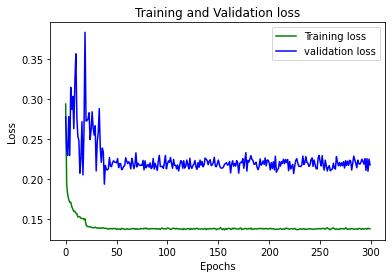

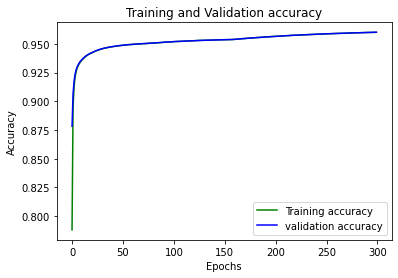

accuracy:  0.9601454734802246
at epoch: 299


In [12]:
import matplotlib.pyplot as plt

for key in predict.history.keys():
    print(key)
loss_train = predict.history['loss']
loss_val = predict.history['val_loss']
no_epochs = range(epochs)
plt.plot(no_epochs, loss_train, 'g', label='Training loss')
plt.plot(no_epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss_train = predict.history['binary_accuracy']
loss_val = predict.history['val_binary_accuracy']
plt.plot(no_epochs, loss_train, 'g', label='Training accuracy')
plt.plot(no_epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

mx = max(loss_val)
print("accuracy: ", mx)
print("at epoch:", loss_val.index(mx))

In [8]:
y_pred = model.predict(X_test)

2022-04-25 17:03:23.881731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [9]:
y_pred

array([[9.99999881e-01, 1.44336326e-07],
       [9.99999881e-01, 1.15224459e-07],
       [9.99998331e-01, 1.61390676e-06],
       ...,
       [1.02002196e-01, 8.97997797e-01],
       [9.48970735e-01, 5.10292351e-02],
       [9.14636145e-11, 1.00000000e+00]], dtype=float32)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [ ]:
import matplotlib.pyplot as plt

for key in history.history.keys():
    print(key)
loss_train = history.history['loss']
no_epochs = range(epochs)
plt.plot(no_epochs, loss_train, 'g', label='Training loss')
# plt.plot(no_epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss_train = history.history['binary_accuracy']
plt.plot(no_epochs, loss_train, 'g', label='Training accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=tf.keras.metrics.BinaryAccuracy())
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
# rm -rf logs
%load_ext tensorboard
log_folder = 'logs'
callbacks = [
            EarlyStopping(patience = 5),
            TensorBoard(log_dir=log_folder)
            ]

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
# rm -rf logs
%load_ext tensorboard
log_folder = 'logs'
callbacks = [
            EarlyStopping(patience = 5),
            TensorBoard(log_dir=log_folder)
            ]
model.fit(training_set, epochs=epochs,validation_data=val_dataset,callbacks=callbacks)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/100
4711/4711 [==============================] - 75s 16ms/step - loss: 0.0252 - binary_accuracy: 0.9924 - val_loss: 0.5137 - val_binary_accuracy: 0.9559
Epoch 2/100
4711/4711 [==============================] - 76s 16ms/step - loss: 0.0250 - binary_accuracy: 0.9925 - val_loss: 0.5150 - val_binary_accuracy: 0.9560
Epoch 3/100
4711/4711 [==============================] - 76s 16ms/step - loss: 0.0249 - binary_accuracy: 0.9925 - val_loss: 0.5183 - val_binary_accuracy: 0.9559
Epoch 4/100
4711/4711 [==============================] - 77s 16ms/step - loss: 0.0247 - binary_accuracy: 0.9926 - val_loss: 0.5204 - val_binary_accuracy: 0.9559
Epoch 5/100
4711/4711 [==============================] - 76s 16ms/step - loss: 0.0246 - binary_accuracy: 0.9926 - val_loss: 0.5218 - val_binary_accuracy: 0.9558
Epoch 6/100
4711/4711 [==============================] - 77s 16ms/step - loss: 0.0244 - binary_accuracy: 